In [2]:
import torch
import random
import matplotlib.pyplot as plt

step: 0
select argmax: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
step reward: tensor(0.5251) 0.5251189470291138
updtae self.action_counts[action]: tensor(1.)
updtae alpha: tensor(1.)
updtae reward: 0.5251189470291138
after update: action, q_estimates: 0 tensor(0.5251)
step: 1
select argmax: tensor([0.5251, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
step reward: tensor(0.0219) 0.021932482719421387
updtae self.action_counts[action]: tensor(2.)
updtae alpha: tensor(0.5000)
updtae reward: 0.021932482719421387
after update: action, q_estimates: 0 tensor(0.2735)
step: 2
select argmax: tensor([0.2735, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])
step reward: tensor(0.3726) 0.372578889131546
updtae self.action_counts[action]: tensor(3.)
updtae alpha: tensor(0.3333)
updtae reward: 0.372578889131546
after update: action, q_estimates: 0 tensor(0.3065)
step: 3
select argmax: tensor([0.3065, 0.0000, 0.0000, 0.0000, 0.0

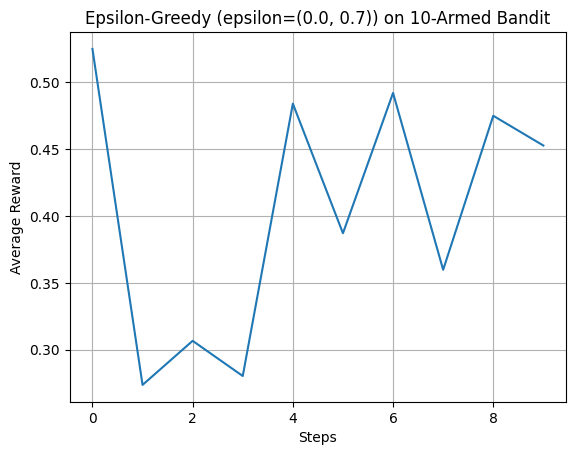

In [12]:
# 🎯 PyTorch Example: k-Armed Bandit with Epsilon-Greedy Strategy


class KArmedBandit:
    def __init__(self, k=10):
        self.k = k
        self.true_rewards = torch.randn(k)  # True action values

    def step(self, action):
        reward = torch.normal(mean=self.true_rewards[action], std=torch.tensor(1.0))
        print("step reward:",reward,reward.item())
        return reward.item()

class EpsilonGreedyAgent:
    def __init__(self, k, epsilon):
        self.k = k
        self.epsilon = epsilon
        self.q_estimates = torch.zeros(k)  # Estimated values
        self.action_counts = torch.zeros(k)  # N(a)

    def select_action(self):
        if random.random() < self.epsilon:
            print("epsilon")
            return random.randint(0, self.k - 1)
        else:
            print("select argmax:",self.q_estimates)
            return torch.argmax(self.q_estimates).item()

    def update(self, action, reward):
        self.action_counts[action] += 1
        alpha = 1.0 / self.action_counts[action]
        print("updtae self.action_counts[action]:",self.action_counts[action])
        print("updtae alpha:",alpha)
        print("updtae reward:",reward)
        
        self.q_estimates[action] += alpha * (reward - self.q_estimates[action])
        print("after update: action, q_estimates:",action, self.q_estimates[action])

# Simulation
k = 10
epsilon1 = 0.0
epsilon2 = 0.7
steps = 10
bandit = KArmedBandit(k)
bandit2 = KArmedBandit(k)
agent = EpsilonGreedyAgent(k, epsilon1)
agent2 = EpsilonGreedyAgent(k, epsilon2)

rewards = []
rewards2 = []
for t in range(steps):
    print("step:",t)
    action = agent.select_action()
    #action2 = agent2.select_action()
    #print(action, action2)
    reward = bandit.step(action)
    #reward2 = bandit2.step(action)
    #print(reward,reward2)
    agent.update(action, reward)
    #agent2.update(action2, reward2)
    rewards.append(reward)
    #rewards2.append(reward2)
    
#print(len(rewards), len(rewards2))
# for idx in range(10):
#     print(rewards[idx], rewards2[idx])
#torch.tensor(rewards2).cumsum(0)/(torch.arange(steps)+1)
# Plot results
plt.plot(torch.tensor(rewards).cumsum(0) / (torch.arange(steps) + 1)) #blue?
#plt.plot()
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title(f"Epsilon-Greedy (epsilon={epsilon1,epsilon2}) on {k}-Armed Bandit")
plt.grid(True)
plt.show()